In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
from sklearn.datasets import load_iris
import seaborn as sns

# 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [2]:
df_house_prices = pd.read_csv('train.csv')
df_house_prices.head(10)
# # df_house_prices.info()
# #df_house_prices.describe()
#df_house_prices.columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

●アイオワ州エイムスの住宅に関するあらゆる側面を説明する79の説明変数を有し、各住宅の最終的な販売価格を予測するためのデータセット。

# 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

各特徴量がどういったものかを見る。（数値データか文字データなど）
今回の目的変数はどの列か確認する。
特徴量の平均値と標準偏差、四分位数を一度に表示させる。

### ≪各特徴量を見る。≫

In [3]:
df_house_prices.dtypes
# df_house_prices['SalePrice'].value_counts()

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


### ≪今回の目的変数は（9行目まで）≫

In [4]:
df_house_prices.SalePrice.iloc[:10]

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64

### ≪特徴量の平均値と標準偏差、四分位数を一度に表示させる。≫

In [5]:
df_house_prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。  

・各特徴量の欠損値の有無を確認する。  

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。   

・欠損値が何パーセント含まれるかを確認する。  
・5つ以上欠損値がある特徴量（列）は削除する。  
・欠損値があるサンプル（行）は削除する。

In [6]:
!pip install missingno


In [7]:
#欠損値が何パーセント含まれるかを確認する。
missing_value = df_house_prices.isnull().sum() / len(df_house_prices) * 100
print(missing_value[missing_value>0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [8]:
#5つ以上欠損値がある特徴量（列）は削除する。
missing_5_columns = df_house_prices.isnull().sum()[df_house_prices.isnull().sum()>=5]# 5つ以上欠損値がある列は
missing_columns = missing_5_columns.index #5つ以上欠損値がある列のインデックスを取得
# missing_columns
m_df = df_house_prices.drop(missing_columns, axis=1)
print("5つ以上欠損値がある特徴量（列）は削除すると")
display(m_df.head(10))


5つ以上欠損値がある特徴量（列）は削除すると


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [9]:
#欠損値があるサンプル（行）は削除する。
m_df.dropna(axis=0)
print("欠損値がある行を削除した後の行数は: {}行".format(len(m_df.dropna(axis=0))))

欠損値がある行を削除した後の行数は: 1459行


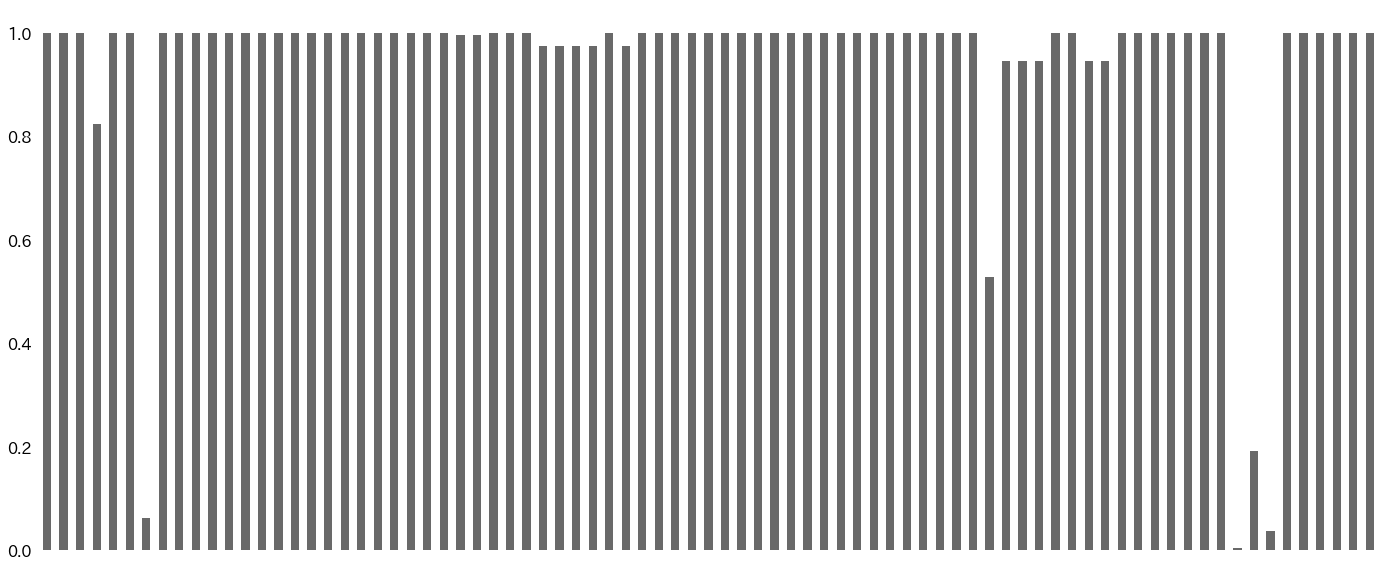

In [10]:
import missingno as msno
msno.bar(df_house_prices);

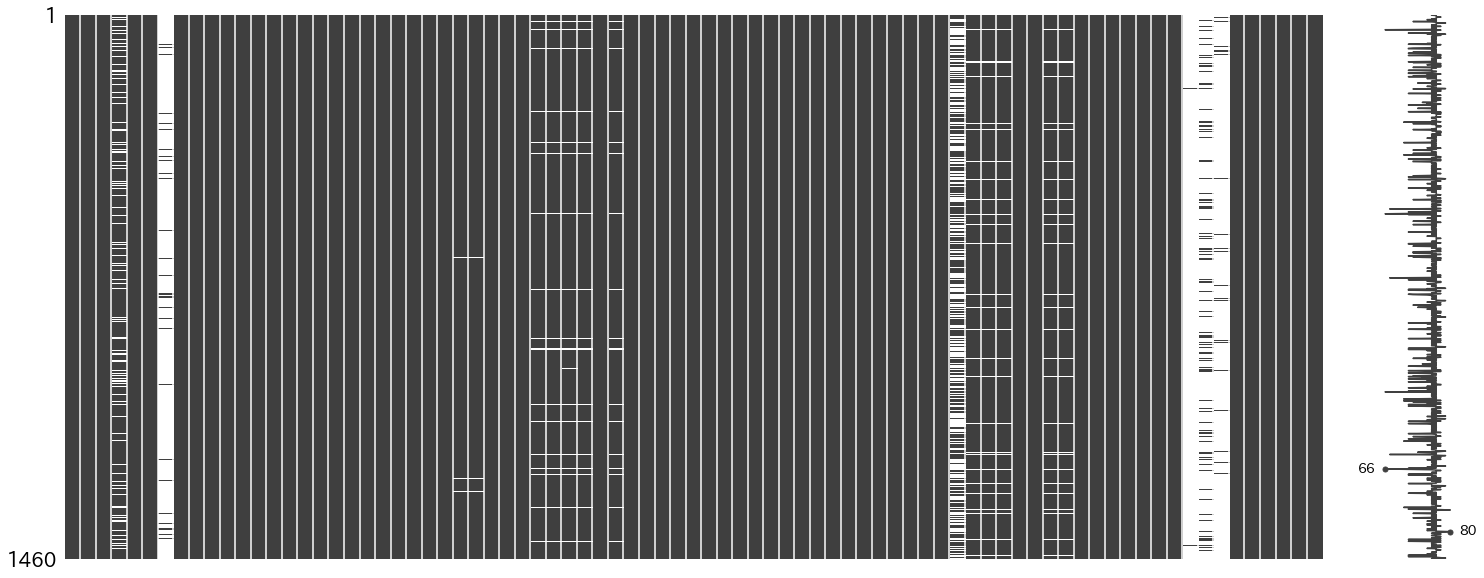

In [11]:
msno.matrix(df_house_prices)

# 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

尖度
歪度

# 【問題6】分布の確認
●seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。  
●目的変数に対して対数変換を行う。  
●対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。  

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

seaborn.distplot — seaborn 0.9.0 documentation

Skewness(歪度) : 1.8828757597682129
Kurtosis(尖度) : 6.536281860064529


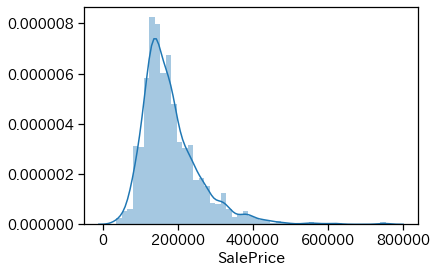

In [12]:
sns.set_context("notebook", 1.3)
sns.distplot(df_house_prices['SalePrice'])
var = 'SalePrice'
print("Skewness(歪度) :", df_house_prices[var].skew())
print("Kurtosis(尖度) :", df_house_prices[var].kurt())

In [13]:
print('目的変数に対して対数変換を行う。')
df_house_prices_conversion = df_house_prices['SalePrice'].apply(np.log)
print(df_house_prices_conversion.head())

目的変数に対して対数変換を行う。
0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64


Skewness(歪度) : 0.12133506220520406
Kurtosis(尖度) : 0.8095319958036296


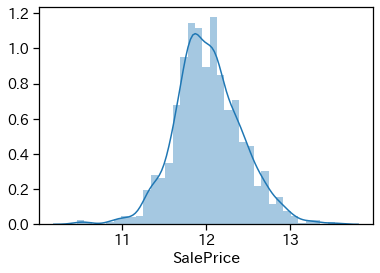

In [14]:
sns.set_context("notebook", 1.3)
sns.distplot(df_house_prices_conversion)

print("Skewness(歪度) :", df_house_prices_conversion.skew())
print("Kurtosis(尖度) :", df_house_prices_conversion.kurt())

対数変換とは、対数正規分布にしたがう変数の対数をとって正規分布に従う変数を作ることです。  
対数変換により、少数や、巨大な数値などを整理・表現しやすくすることができます。  

確率論および統計学において、対数正規分布（たいすうせいきぶんぷ、英: log-normal distribution）は、連続確率分布の一種である。この分布に従う確率変数の対数をとったとき、対応する分布が正規分布に従うものとして定義される。そのため中心極限定理の乗法的な類似が成り立ち、独立同分布に従う確率変数の積は漸近的に対数正規分布に従う。

# 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。  

・相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。  
・目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。  
・選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。  
・選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。  

補足  
重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。



In [15]:
df_corr = df_house_prices.corr()
df_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


相関係数行列のヒートマップ


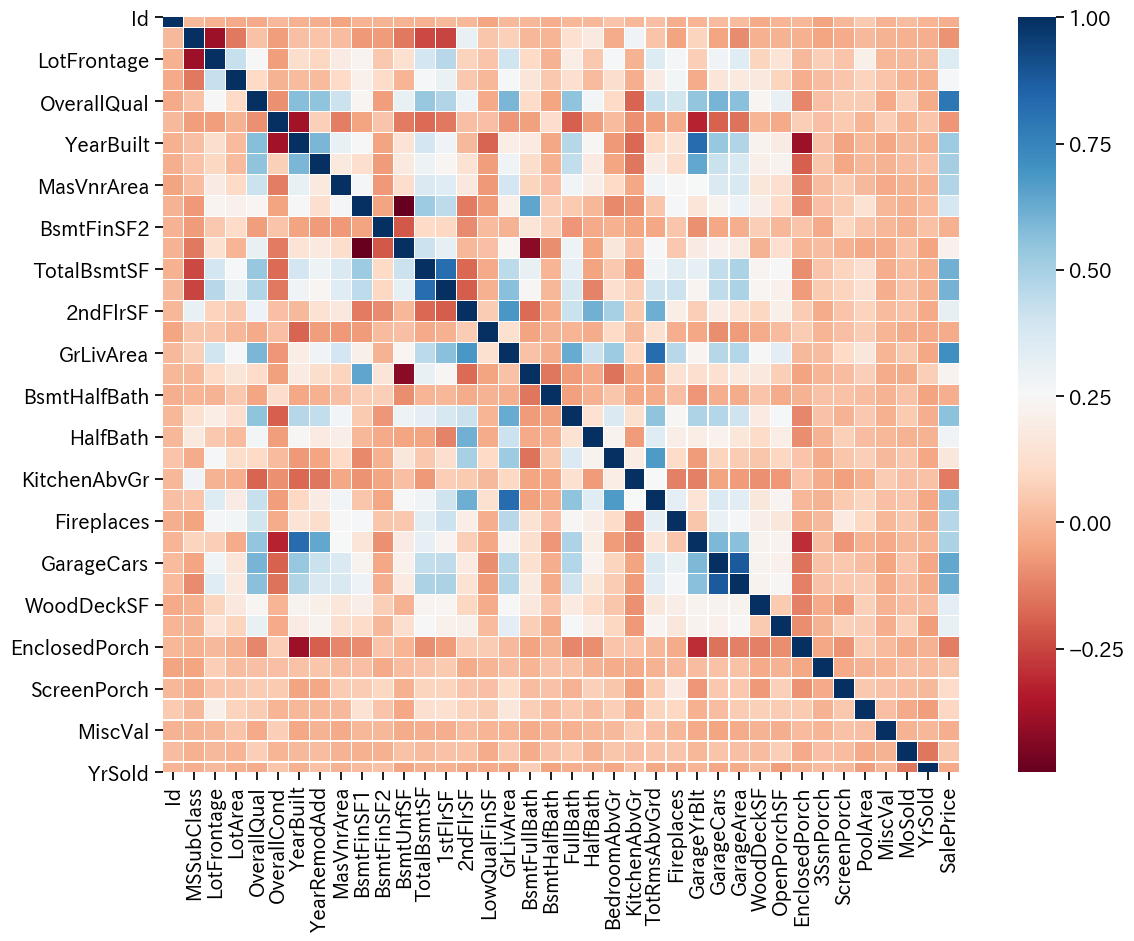

In [16]:
print("相関係数行列のヒートマップ")

colormap = plt.cm.RdBu
plt.figure(figsize=(15, 10), dpi=100)
sns.heatmap(df_corr,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)
plt.show()


In [17]:
#目的変数と相関の高い特徴量を抽出する

df_corr_sort = df_corr.sort_values(by=['SalePrice'], ascending=False) #相関係数行列から目的変数と相関の高い10個の特徴量を抽出
df_corr_sort_label = df_corr_sort['SalePrice']
df_sort_10 = df_corr_sort_label.iloc[1:11]
df_sort_10

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

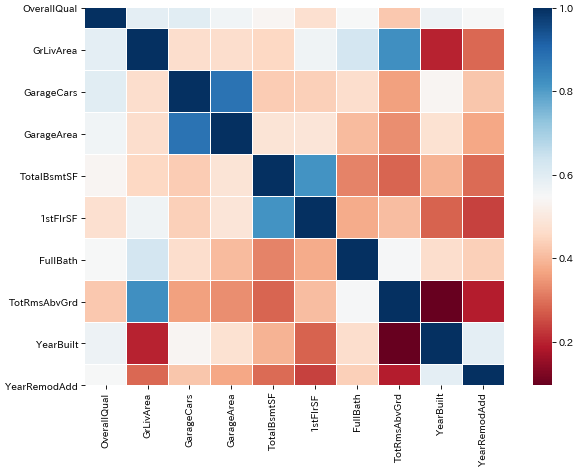

In [18]:
#目的変数と相関の高い特徴10個のヒートマップを作製
df_sort_10_index = df_house_prices[df_sort_10.index]
df_sort_10_index_corr = df_sort_10_index.corr()


colormap = plt.cm.RdBu
plt.figure(figsize=(15, 10), dpi=50)
sns.heatmap(df_sort_10_index_corr,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)
plt.show()

1, OverallQual: 家の全体的な材料と仕上げを評価します  
2, GrLivArea: 上階（地）居住面積平方フィート  
3, GarageCars: 自動車容量のガレージのサイズ  
4, GarageArea: 平方フィートのガレージのサイズ    
5, TotalBsmtSF: 地下面積の総平方フィート  
6, 1stFlrSF: 1階平方フィート  
7, FullBath: グレード以上のフルバスルーム  
8, TotRmsAbvGrd: グレード以上の総部屋数（バスルームは含まれません）  
9, YearBuilt: 建てられた年  
10, YearRemodAdd: 改装した年

In [19]:
df_sort_10_index_corr

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855
YearRemodAdd,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.191740,0.592855,1.000000


### 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。  

#### 1. TotRmsAbvGrd: グレード以上の総部屋数（バスルームは含まれません） ×GrLivArea: 上階（地）居住面積平方フィート  

#### 2. GarageArea: 平方フィートのガレージのサイズ × GarageCars: 自動車容量のガレージのサイズ  

#### 3. 1stFlrSF: 1階平方フィート × TotalBsmtSF: 地下面積の総平方フィート